In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Step 1: Transmitter Placement
Holography is most likely in the near-field unless we have access to a geostationary satellite 1000s of kilometers away. This can be shown through the far-field equation given by:
$$R_F>\frac{2D^2}{\lambda}$$
So how close can we come to our dish antenna? A good rule of thumb is to be greater than approximetly five aperature diameters away such that:
$$R_{min}\approx 5D$$
It is still important to note that while this would be the minimum distance to get usable measurements, placing the transmitter farther would decrease the effect of systematic errors. We reccomended, if possible, that the transmitter is placed closer to the cutoff of the reactive near field which is given as:
$$R_{react}<0.62\sqrt{\frac{D^3}{\lambda}}$$

**Parameters:**

$D$ is the diameter of the dish antenna

$\lambda$ is the wavelength at which holography is being done

$\nu$ is the frequency at which holography is being done

$c = 3*10^8$ is the speed of light

In [11]:
# Parameters
D = 12 # m
nu = 104.02 # GHz
c = 3 * 10**8 # m/s

# Wavelength
lam = c/(nu*10**9) # m

# Far-field cutoff
R_F = (2*D**2)/lam # m

print('R_F = ' + str(R_F))

# Minimum transmitter distance
R_min = 5*D # m

print('R_min = ' + str(R_min))

# Reactive near-field cutoff
R_react = 0.62*np.sqrt(D**3/lam) # m

print('R_react = ' + str(R_react))

R_F = 99859.2
R_min = 60
R_react = 479.91171988189654


# Step 2: Spatial Resolution $\delta d$

The spatial resolution $\delta d$ in the aperture plane is not calculated. It is just chosen based on the positions of panel adjusters. “In order to be able to determine individual adjuster positioning to optimize antenna surface setting using holography measurements, one needs to be able to measure deformations over individual panels with enough resolution in the aperture to see the influence of individual panel adjusters”. If the panels have dimensions $x$ by $y$ in size and each of the corner adjustors are a distance $a$ from each from each other, then the minimum distance between any corner adjuster and the center adjuster is $a\sqrt{2}$. We need at least two measurements between adjuster so the spatial resolution should be set at:

$$\delta d <\frac{a\sqrt{2}}{2}$$

**Parameters:**

$\delta d$ is the spatial resolution

$a$ is the distance between corner adjustors


In [12]:
# Parameters
a = 0.2828712 # m

# Spatial resolution
delta_d = a*np.sqrt(2)/2 *10**2 # cm

print("delta_d < " + str(delta_d))

delta_d < 20.00201437223761


# Step 3: Grid Point Integration Time $t_{int}$ and Total Map Time $\Delta t_{map}$

If we have chosen a measurement frequency $\nu$ then we can find the angular extent of holography map $\theta_{ext}$. This now allows us to find $\Delta t_{map}$:

$$\Delta t_{map} = N_{row}t_{row} = \frac{171768 f_{osr} f_1 f_{apo}^2 D(m)}{\dot{\theta}(arcsec/sec) \nu (GHz) (\delta d (cm))^2} hours$$

The integration time per point can also be calculated to be:

$$t_{int} = \frac{\Delta t_{map}}{N_{grid}} = \frac{6.2\cdot 10^4 f_{osr}f_1 f_{apo}^2}{\dot{\theta}(arcsec/sec)\nu(GHz)D(m)}$$

**Parameters:**

$f_1$ is the primary beam taper factor ($f_1 \approx 1$)

$f_{apo}$ is an apodization smoothing factor used in the holography imaging to dampen ringing on the edge of the aperture (cited to be 1.3)

$f_{osr}$ oversampling factor between rows (usually 2.2)

$f_{oss}$ oversampling factor along a row

$\dot{\theta}$ is the chosen rotation rate of the dish antenna

$t_{row}$ is the time it takes to measure one holography row

$t_{int}$ is the integration time per image grid point

$\Delta t_{map}$ is the total time it takes to measure one holography map

In [13]:
# Parameters
f_1 = 1.13
f_apo = 1.3  # hard code with option to change (put into box by defult)
f_osr = 2.2
f_oss = 15  #ignore f_oss, not needed in step 3, add into step 4 
dtheta = 300 # arcsec/sec

# integration time
t_int = 6.2*10**4*f_osr*f_1*f_apo**2 / (dtheta*nu*D) # seconds (equation 10 from NGVLA memo)
# t_int = 36 * 10**-3 *f_oss # seconds (ALMA intergation time)

print('t_int = ' + str(t_int))

# total map time
t_map = 171768 * f_osr * f_1 * f_apo**2 * D / (dtheta * nu * delta_d**2) # hours

print('t_map = ' + str(t_map))

t_int = 0.6956009528082207
t_map = 0.6936266321326223


# Step 4: Holography Map Sampling Intervals $\theta_{sr}$ and $\theta_{ss}$

Assuming a boustrophedonic scanning pattern the spatial resolution is given as:

$$\delta d = \frac{D}{N_{row}} = \frac{f_1 f_{apo} c}{\nu \theta_{ext}}$$

Every variable is constant except for the measurment frequency $\nu$ and the angular extent of the holography map $\theta_{ext}$, so with the chosen measurment frequency we find $\theta_{ext}$:

$$\theta_{ext} = \frac{f_1 f_{apo} c}{\nu\delta d}$$

By also finding the primary beam size ($\theta_b$) of a single measurement in on the aperature then we can calculate the angular sampling intervals along the rows and colums of the scan ($\theta_{sr}$ and $\theta_{ss}$ respectively):

$$\theta_{b} = \frac{61836.6 f_1 }{\nu(GHz) D (m)}arcsec$$

$$\theta_{sr} = \frac{\theta_b}{f_{osr}}arcsec$$

$$\theta_{ss} = \frac{\theta_b}{f_{oss}}arcsec$$

**Parameters:**

$\theta_{ext}$ is the angular extent of the holography map

$\theta_b$ is the primary beam size

$\theta_{sr}$ is the sampling interval between rows

$\theta_{ss}$ is the sampling interval along a scan

In [14]:
# angular extent of map
theta_ext = 1717.7*f_1*f_apo/(delta_d*nu) # deg
print('theta_ext = ' + str(theta_ext))

# beamwidth
theta_b = 61836.6*f_1/(nu*D) # arcsec

print('theta_b = ' + str(theta_b))

# sampling interval between rows
theta_sr = theta_b/f_osr # arcsec

print('theta_sr = ' + str(theta_sr))

# sampling interval along scan
theta_ss = theta_b/f_oss # arcsec

print('theta_ss = ' + str(theta_ss))

theta_ext = 1.212770227932177
theta_b = 55.97910497981157
theta_sr = 25.445047718096166
theta_ss = 3.731940331987438


# Step 5: Pointing Accuracy $\theta_{point}$ and $SNR$ required for a Surface Deformation ($\delta z$)

An important requirement for the design of our hardware is understanding how pointing errors will affect our surface deformation measurement. With our chosen measurement frequency $\nu$ and surface deformation $\delta_z$ the pointing accuracy requirement $\theta_{point}$ can be calculated:

$$\theta_{point} < \frac{180\delta_z \nu}{c} = (6\cdot 10^{-4}) \delta_{z}(\mu m) \nu(GHz)$$

The system should be able to meet these requirements, but it is ok if there is drift in phase during a holography measurement due to there being a recalibration that is usually done after every few scans along a row. To find the required SNR that is in our holography measurement we first need to know how many grid points will be in our final holography map, assuming a square grid:

$$N_{row} = \frac{Df_{apo}f_{osr}}{\delta d}$$

We can now calculate the given SNR we need to measure on the edge of the aperature to be able to measure a given surface deformation ($\delta_z$):

$$\delta_z = \frac{\lambda}{16\sqrt{2}}\sqrt{\frac{N_{row}^2}{f_{osr}f_{oss}}}\frac{1}{SNR}\frac{1}{\sqrt{f_{apo}}}$$

**Parameters**

$\theta_{point}$ is the phase accuracy requirement of the transmitter

$N_{row}$ is the number of final grid points in a row of the holography map

$t_{int}$ is the integration time per image grid point

$k$ is Boltzmann’s constant

$T_{sys}$ is the system temperature

$B$ is the detector bandwidth

$SNR$ is the signal-to-noise-ratio

$\delta_z$ is the surface deformation of the holography map

In [15]:
# Parameters
delta_z = 5 # um

theta_point = 6*10**-4 * delta_z * nu

print("theta_point < " + str(theta_point)) # deg

# total number of grid points
N_row = D/(delta_d*10**-2)*f_apo*f_osr

print('N_row = ' + str(N_row))
# print('N_grid = ' + str(N_grid))

# delta_z = 0.044 * lam * np.sqrt(N_row**2 / (f_oss * f_osr)) * 1 / (10**(SNR/10)) * 1 / np.sqrt(f_apo) * 1e6
SNR = 10*np.log10(0.044 * lam * np.sqrt(N_row**2/(f_oss*f_osr)) * 1/delta_z * 1/np.sqrt(f_apo) *10**6) # dB

print('SNR > ' + str(SNR))

theta_point < 0.31206
N_row = 171.58271842677738
SNR > 28.22731975516623


# Step 6: Transmitter output power $P$

A Gaussian beam's electric field at a distance $z$ from the waist (where the beam is the narrowest) is given by:

$E(r, z) = E_0 \frac{w_0}{w(z)} \exp\left(-\frac{r^2}{w(z)^2}\right) \exp\left(-i \left(\frac{k r^2}{2 R(z)} - \psi(z)\right)\right)$

where:
- $E_0$ is the peak electric field amplitude at the waist.
- $w_0$ is the beam waist (half the diameter of the transmitter).
- $w(z)$ is the beam radius at distance $z$.
- $r$ is the radial distance from the beam axis.
- $k = \frac{2\pi}{\lambda}$ is the wavenumber, with $\lambda$ being the wavelength.
- $R(z)$ is the radius of curvature of the wavefront at distance $z$.
- $\psi(z)$ is the Gouy phase shift.

However, for calculating the coupling efficiency, we only need the intensity distribution (which is proportional to $|E(r, z)|^2$) and not the full complex field.

The beam radius $w(z)$ at a distance $z$ is:

$w(z) = w_0 \sqrt{1 + \left(\frac{z}{z_R}\right)^2}$

where $z_R = \frac{\pi w_0^2}{\lambda}$ is the Rayleigh range, representing the distance over which the beam's cross-sectional area approximately doubles.

The beam-coupling efficiency $\eta$ quantifies how much of the transmitter's Gaussian beam is captured by the receiver's aperture. It is calculated using the overlap integral:

$\eta = \frac{\left|\int_{\text{aperture}} E_t(\mathbf{r}) E_r^*(\mathbf{r}) \, d\mathbf{r}\right|^2}{\int_{\text{aperture}} |E_t(\mathbf{r})|^2 \, d\mathbf{r} \int_{\text{aperture}} |E_r(\mathbf{r})|^2 \, d\mathbf{r}}$

Since we assume perfect alignment between the transmitter and receiver, the formula simplifies to integrating the square of the beam's amplitude over the receiver's aperture.

The integration is done over a circular aperture of radius $D_a/2$, which represents the receiver's aperture. The integral computes how much of the Gaussian beam's power falls within the receiver:

$\text{Overlap} = \int_0^{D_a/2} r \exp\left(-\frac{2r^2}{w(z)^2}\right) \, dr$

The total power in a Gaussian beam is given by:

$P_{\text{total}} = \frac{\pi w(z)^2}{2}$

This normalization ensures that the efficiency \(\eta\) is calculated as a fraction of the total power.

Finally, the beam-coupling efficiency is:

$\eta = \left(\frac{\text{Overlap}}{P_{\text{total}}}\right)^2$

This efficiency is then converted to decibels (dB):

$\eta_{\text{dB}} = 10 \times \log_{10}(\eta)$


In [16]:
# Parameters
k = 1.38 * 10**-23 # Boltzman constant in J/K
B = 0.01 # Bandwidth in MHz
T_sys = 3600 # K
G = 33 # dB of gain in their pyramidal horn antenna
D_t = 0.002126  # Transmitter diameter in meters
z = 315  # Distance between transmitter and receiver in meters

# noise floor
noise_floor = 10*np.log10(k*B*10**6*T_sys/(1*10**-3))
# print(f"Noise floor: {noise_floor:.4f} dBm")

# Beam waist at the transmitter
w_0 = D_t / 2  # Beam waist at the transmitter
z_R = np.pi * w_0**2 / lam  # Rayleigh range

# Beam radius at the receiver location
w_z = w_0 * np.sqrt(1 + (z / z_R)**2)

# Define the integrand function for overlap integral
def integrand(r, theta):
    # Compute the Gaussian field amplitude squared
    amplitude_squared = np.exp(-r**2 / w_z**2)
    return r * amplitude_squared

# Calculate the overlap integral over the aperture
overlap, _ = dblquad(integrand, 0, D/2, lambda theta: 0, lambda theta: 2*np.pi)

# Calculate the beam-coupling efficiency
eta = (overlap / (np.pi * w_z**2 / 2))**2

# Convert to dB
eta_dB = 10 * np.log10(eta)

# print(f"Beam radius at distance z: {w_z:.4f} m")
# print(f"Beam-coupling efficiency: {eta_dB:.4f} dB")

P_dB = noise_floor + SNR + eta_dB + G
# print(f"Transmitter output power: {P_dB:.4f} dBm")

P = (1*10**-3) * 10**(P_dB/10)
print(f"Transmitter output power: {P} W")

Transmitter output power: 6.837177247244758e-16 W


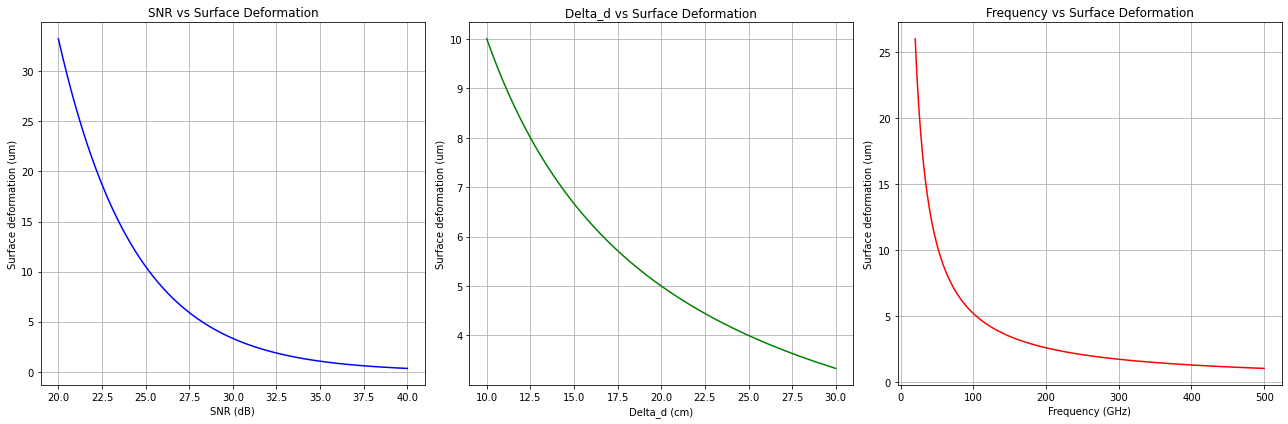

In [17]:
# Subplot 1: SNR vs Surface Deformation
SNR_array = np.linspace(20, 40, 1000)
delta_z_array = 0.044 * lam * np.sqrt(N_row**2 / (f_oss * f_osr)) * 1 / (10**(SNR_array/10)) * 1 / np.sqrt(f_apo) * 1e6

# Subplot 2: Delta_d vs Surface Deformation
delta_d_array = np.linspace(10, 30, 1000)
N_row_array = D / (delta_d_array * 1e-2) * f_apo * f_osr
delta_z_array2 = 0.044 * lam * np.sqrt(N_row_array**2 / (f_oss * f_osr)) * 1 / (10**(SNR/10)) * 1 / np.sqrt(f_apo) * 1e6

# Subplot 3: Frequency vs Surface Deformation
nu_array = np.linspace(20, 500, 1000)  # Frequency in GHz
lam_array = c / (nu_array * 1e9)       # Convert GHz to Hz and get wavelength in meters
delta_z_array3 = 0.044 * lam_array * np.sqrt(N_row**2 / (f_oss * f_osr)) * 1 / (10**(SNR/10)) * 1 / np.sqrt(f_apo) * 1e6

# Create a single figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot on the first subplot (SNR vs Surface Deformation)
axs[0].plot(SNR_array, delta_z_array, linestyle='-', color='b')
axs[0].set_title('SNR vs Surface Deformation')
axs[0].set_xlabel('SNR (dB)')
axs[0].set_ylabel('Surface deformation (um)')
axs[0].grid(True)

# Plot on the second subplot (Delta_d vs Surface Deformation)
axs[1].plot(delta_d_array, delta_z_array2, linestyle='-', color='g')
axs[1].set_title('Delta_d vs Surface Deformation')
axs[1].set_xlabel('Delta_d (cm)')
axs[1].set_ylabel('Surface deformation (um)')
axs[1].grid(True)

# Plot on the third subplot (Frequency vs Surface Deformation)
axs[2].plot(nu_array, delta_z_array3, linestyle='-', color='r')
axs[2].set_title('Frequency vs Surface Deformation')
axs[2].set_xlabel('Frequency (GHz)')
axs[2].set_ylabel('Surface deformation (um)')
axs[2].grid(True)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()
fig.savefig('deltaZ_vs.png', transparent=True)